In [1]:
from pathlib import Path

import re
import pandas as pd
from pandas.errors import EmptyDataError 

import numpy as np
import matplotlib.pyplot as plt

from datetime import timedelta
from datetime import datetime as dt
import dateutil.parser as dparser

In [2]:
# Given parameters:
# 1) Date in the form (YYYYMMDD)
# 2) Time in the form (HHMMSS)
# 4) det_type can either be 'LF' or 'HF'

# Output:
# The table of detections. 
# - Column 1 is start time of every detection within file
# - Column 2 is end time of every detection within file
# - Column 3 is lowest frequency of every detection within file
# - Column 3 is highest frequenct of every detection within file
# # of rows of df_detection will give us # of detections

def read_detection(date, time, det_type):
    source_dir = f"detections/{date}/{date}_{det_type}_detections"

    file_name = f"{det_type}_{date}_{time}.WAV.txt"
    file_path = f"{source_dir}/{file_name}"
    
    if (Path(file_path).is_file()):
        try:
            df_detection = pd.read_csv(file_path, sep='\t')
        except EmptyDataError:
            print(f"{file_path} is empty")
            
    return df_detection

In [3]:
# These are variables that will help us point to specific folders and files

# detection_dir is the folder name where our detections are.
# This is an attempt to make code independent of the existence of recordings
# and only relying on the batch detection files.
date = "20220701"
detection_dir = f"detections/{date}/{date}_hf_detections"

# Construct path object linked to the directory of files for datetime-parsing
file_dir = Path(detection_dir)
sorted_files = sorted(list(file_dir.iterdir()))

audio_dur = timedelta(minutes=29, seconds=55)

# We fill the first 3 columns of our dataframe right here using dateutils parser
file_names = []
dates = []
s_times = []
e_times = []
# We fill out the next 2 columns of data regarding the number of LF and HF selections
num_lf_detections = np.zeros(len(sorted_files))
num_hf_detections = np.zeros(len(sorted_files))

In [4]:
# Iterate through all file paths to extract and store table information for each file
for i, file in enumerate(sorted_files):
    file_name = file.name
    recording_name = (re.search('hf_(.*).txt', file_name)).group(1)
    file_info = dparser.parse(file_name, fuzzy=True)
    
    date = str(file_info.date())
    s_time = str(file_info.time())
    e_time = str((file_info + audio_dur).time())
    
    file_names.append(recording_name)
    dates.append(date)
    s_times.append(s_time)
    e_times.append(e_time)
    
    # We need to remove the - from YYYY-MM-DD which is standard datetime format.
    # This will help us find files in the YYYYMMDD standard Audiomoth format
    date = date.replace('-', '')
    # Same goes for the HH:MM:SS standard datetime format and the Audiomoth's HHMMSS standard
    time = s_time.replace(":", "")
    
    lf_file_detections = read_detection(date, time, 'lf')
    num_lf_detections[i] = lf_file_detections.shape[0]/2
    
    hf_file_detections = read_detection(date, time, 'hf')
    num_hf_detections[i] = hf_file_detections.shape[0]/2

/home/adkris1002/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/dateutil/parser/_parser.py:1212: UnknownTimezoneWarning: tzname WAV identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [5]:
df = pd.DataFrame()

df["File Names"] = file_names
df["Date"] = dates  
df["Start Time (UTC)"] = s_times
df["End Time (UTC)"] = e_times
df["# of LF detections"] = num_lf_detections
df["# of HF detections"] = num_hf_detections

df

,File Names,Date,Start Time (UTC),End Time (UTC),# of LF detections,# of HF detections
0,20220701_020000.WAV,2022-07-01,02:00:00,02:29:55,1.0,0.0
1,20220701_023000.WAV,2022-07-01,02:30:00,02:59:55,5.0,0.0
2,20220701_030000.WAV,2022-07-01,03:00:00,03:29:55,2.0,1.0
3,20220701_033000.WAV,2022-07-01,03:30:00,03:59:55,11.0,0.0
4,20220701_040000.WAV,2022-07-01,04:00:00,04:29:55,2.0,0.0
5,20220701_043000.WAV,2022-07-01,04:30:00,04:59:55,653.0,24.0
6,20220701_050000.WAV,2022-07-01,05:00:00,05:29:55,136.0,80.0
7,20220701_053000.WAV,2022-07-01,05:30:00,05:59:55,14.0,36.0
8,20220701_060000.WAV,2022-07-01,06:00:00,06:29:55,55.0,0.0
9,20220701_063000.WAV,2022-07-01,06:30:00,06:59:55,47.0,0.0


<AxesSubplot:xlabel='Start Time (UTC)'>

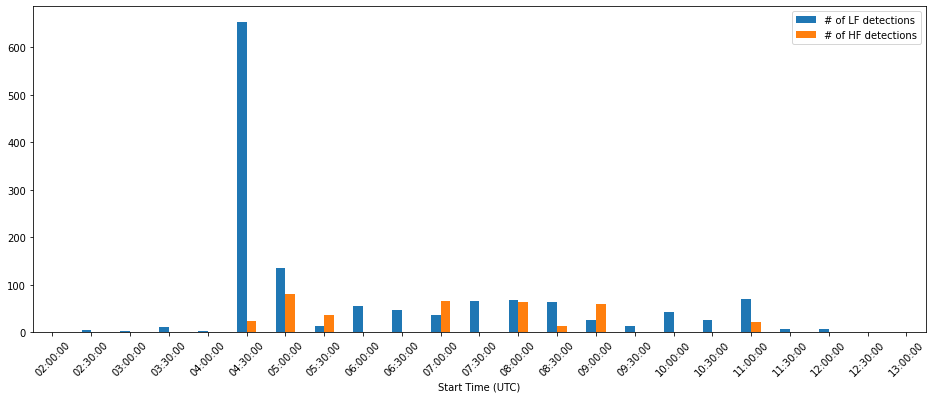

In [6]:
df.plot.bar(x="Start Time (UTC)", figsize=(16, 6), rot=45)